<a href="https://colab.research.google.com/github/RitikaVinayakamurthy/CE888/blob/main/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Loading the Libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder



In [3]:
#Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
# converting label into numbers
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)

In [7]:
#Creating dummies to convert the categorical columns to numerical columns
df_dummies = pd.get_dummies(df)
print(df_dummies)



       age  duration  ...  poutcome_nonexistent  poutcome_success
0       56       261  ...                     1                 0
1       57       149  ...                     1                 0
2       37       226  ...                     1                 0
3       40       151  ...                     1                 0
4       56       307  ...                     1                 0
...    ...       ...  ...                   ...               ...
41183   73       334  ...                     1                 0
41184   46       383  ...                     1                 0
41185   56       189  ...                     1                 0
41186   44       442  ...                     1                 0
41187   74       239  ...                     0                 0

[41188 rows x 64 columns]


In [8]:
#Dropping the duration column
df_dummies.drop(['duration'],axis = 1, inplace = True) 

In [9]:
df_dummies.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'mo

In [10]:
#Checking for missing values
df_dummies.isnull().sum()   

#Since there are no missing values no rows are dropped

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

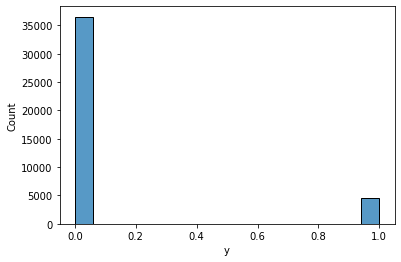

In [11]:
#Histogram plot of the label
sns_plot = sns.histplot(df_dummies['y'])

In [12]:
#Calculating the imbalance in the dataset
values=df_dummies['y'].value_counts()
values

0    36548
1     4640
Name: y, dtype: int64

In [13]:
values[0]

36548

In [14]:
values[1]

4640

In [15]:
Imbalance=(values[1]/values[0])
Imbalance


0.126956331399803

In [19]:
Imbalance_1=(values[1]/values)
Imbalance_1


0    0.126956
1    1.000000
Name: y, dtype: float64

In [20]:
#split dataset in features and target variable
X = df_dummies.drop('y',axis=1) # Features
y = df_dummies.y # Target variable

In [21]:
#Spliting the data into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=50)

In [36]:
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=100,max_depth=3)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.2908777969018933


In [37]:
from sklearn.metrics import f1_score
#Checking the cross validation accuracy scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10)
print('cross_val_score=',score)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions)
print('Cross-Predicted f1_score:', f1_score_clf) #use f1_score

cross_val_score= [0.89408194 0.90075873 0.89499241 0.89681335 0.89499241 0.90197269
 0.90622155 0.89742033 0.8983308  0.89590288]
Cross-Predicted f1_score: 0.24352914697276618


In [38]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
print("Dummy f1_score: " , f1_score(y_test, dummy_clf.predict(X_test)))

Dummy f1_score:  0.12172984516817939


In [87]:
from sklearn.model_selection import GridSearchCV
#Using the Grid search CV we can tune the hyperparameters
# defining parameter range 
param_grid = { 
    'n_estimators': [50,100,150,200,250,300,350,400], #2 diff numbers
    'max_features': ['auto'],
    'max_depth' : [5,10,15,20,25,30],#15
    'criterion' :['gini', 'entropy']#not needed
}

In [91]:
grid = GridSearchCV(estimator=RF_Classifier, param_grid=param_grid, cv= 5)
# fitting the model for grid search 
grid.fit(X_train, y_train) 


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [92]:
# print best parameter after tuning 
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}


In [26]:
# Fitting Random Forest Classifier to the dataset after hyperparameter tuning
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=200,max_depth=10,max_features='auto',criterion='entropy')

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred,average='weighted'))

F1 score: 0.8784445847084498


In [27]:
from sklearn.metrics import f1_score
#Checking the cross validation scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,)
print('cross_val_score=',score)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions,average='weighted')
print('Cross-Predicted f1_score:', f1_score_clf) #use f1_score


cross_val_score= [0.89954476 0.90288316 0.89742033 0.90136571 0.89195751 0.90349014
 0.91198786 0.8983308  0.90075873 0.89954476]
Cross-Predicted f1_score: 0.8767368365888595


In [28]:
#Assigning the column names to features
features=['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

[ 8  7  4  2  6  5 61  0  3  1 42 43 60 50 52 59 49 44 55 33 34 48 10 31
 56 54 57 23 36 22 38 58 28 41  9 14 18 39 17 27 30 25 45 21 32 53 16 13
 51 15 47 12 26 19 37 11 40 20 46 24 29 35]
Feature ranking:
1. nr.employed (0.156643)
2. euribor3m (0.156275)
3. emp.var.rate (0.081952)
4. pdays (0.073585)
5. cons.conf.idx (0.066330)
6. cons.price.idx (0.057201)
7. poutcome_nonexistent (0.045805)
8. age (0.039820)
9. previous (0.022040)
10. campaign (0.018609)
11. loan_yes (0.018387)
12. contact_cellular (0.017732)
13. poutcome_failure (0.017051)
14. month_mar (0.016238)
15. month_nov (0.013568)
16. day_of_week_wed (0.013096)
17. month_jun (0.012345)
18. contact_telephone (0.009866)
19. day_of_week_fri (0.008319)
20. education_unknown (0.007642)
21. default_no (0.006869)
22. month_jul (0.006504)
23. job_admin. (0.006390)
24. education_professional.course (0.006144)
25. day_of_week_mon (0.005290)
26. month_sep (0.005225)
27. day_of_week_thu (0.005138)
28. marital_married (0.005088)
29. defa

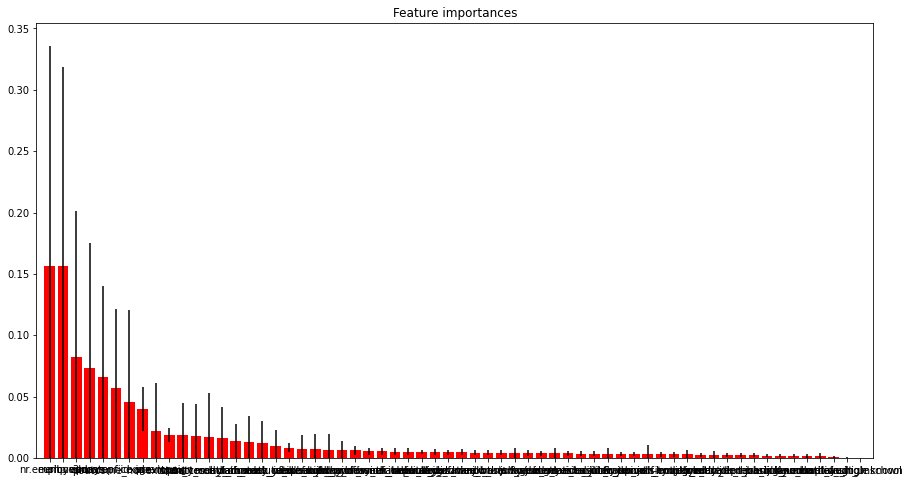

In [29]:
#Feature importance
importances = RF_Classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

# We see the top 3 are:
#1. nr.employed (0.156643)
#2. euribor3m (0.156275)
#3. emp.var.rate (0.081952)

## For Moodle Quiz


In [39]:
#For n_estimators=400,max_depth=6
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=400,max_depth=6)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.30988274706867674


In [40]:
from sklearn.metrics import f1_score
#Checking the cross validation accuracy scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10)
print('cross_val_score=',score)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions)
print('Cross-Predicted f1_score:', f1_score_clf) #use f1_score

cross_val_score= [0.89559939 0.90227618 0.89408194 0.90106222 0.8952959  0.90288316
 0.90986343 0.89681335 0.89893778 0.89742033]
Cross-Predicted f1_score: 0.282067921263249


In [41]:
#For n_estimators=100,max_depth=8,random_state=60
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=60)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.3360522022838499


In [42]:
from sklearn.metrics import f1_score
#Checking the cross validation accuracy scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10)
print('cross_val_score=',score)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions)
print('Cross-Predicted f1_score:', f1_score_clf) #use f1_score

cross_val_score= [0.89802731 0.90349014 0.89650986 0.90075873 0.89408194 0.90440061
 0.91047041 0.89711684 0.89893778 0.89650986]
Cross-Predicted f1_score: 0.30388841927303467


In [43]:
#For n_estimators=100,max_depth=12,random_state=60
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=100,max_depth=12,random_state=60)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.37337413925019125


[ 7  8 61  4  2  0  6  5  3  1 59 49 43 52 60 42 50 55 31 38 36 56 23 44
 54 39 57 28 58 10 22  9 41 18 14 33 30 27 17 48 25 21 13 34 53 32 16 26
 19 15 45 51 47 40 12 11 37 20 46 24 29 35]
Feature ranking:
1. euribor3m (0.148393)
2. nr.employed (0.113660)
3. poutcome_nonexistent (0.076603)
4. emp.var.rate (0.065022)
5. pdays (0.061397)
6. age (0.060275)
7. cons.conf.idx (0.052059)
8. cons.price.idx (0.048685)
9. previous (0.029007)
10. campaign (0.026818)
11. day_of_week_wed (0.016507)
12. month_jun (0.013838)
13. contact_cellular (0.013198)
14. month_nov (0.012439)
15. poutcome_failure (0.012053)
16. loan_yes (0.011745)
17. month_mar (0.011076)
18. day_of_week_fri (0.010003)
19. education_professional.course (0.008650)
20. housing_unknown (0.008404)
21. default_yes (0.008335)
22. day_of_week_mon (0.008108)
23. marital_married (0.008034)
24. contact_telephone (0.007734)
25. month_sep (0.007704)
26. housing_yes (0.007311)
27. day_of_week_thu (0.007209)
28. education_basic.9y (0.007132)

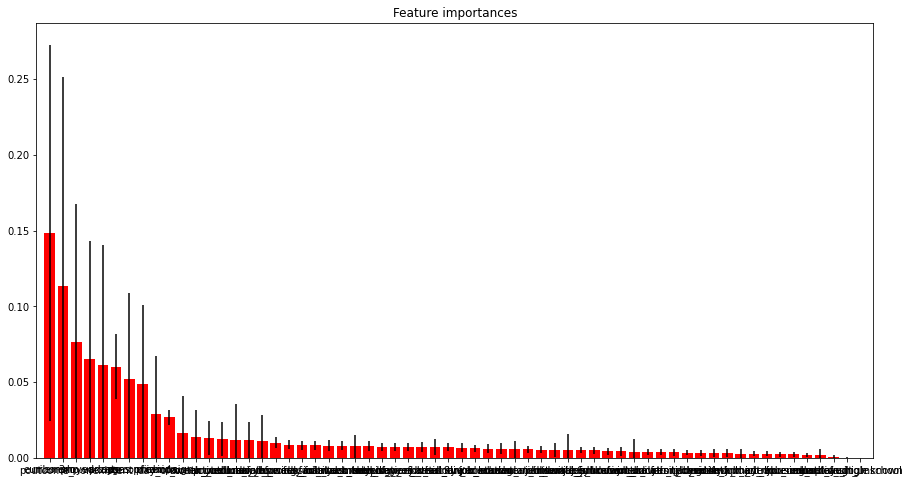

In [44]:
#Feature importance for n_estimators=100,max_depth=12,random_state=60
importances = RF_Classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')

# We see the top 3 are:
#1. euribor3m (0.148393)
#2. nr.employed (0.113660)
#3. poutcome_nonexistent (0.076603)